In [1]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Xs = invwishart.rvs(data['J']+6, np.eye(data['J']), size = 10000)
# np.round(np.mean(Xs,0),2)

In [13]:
log_dir= "log/wirs/20191122_144145_wirs_m7_marg/"
ps = load_obj('ps', log_dir)
data = load_obj('data', log_dir)
ps.keys()

dict_keys(['beta', 'alpha', 'yy', 'Omega', 'Marg_cov'])

In [6]:
np.percentile(ps['beta'][:,0], q=[2.5,97.5])


array([-0.03041482,  0.343705  ])

In [65]:
np.round(np.mean(ps['alpha'], 0),2)

array([-0.53,  0.35, -1.4 , -1.4 , -0.96, -2.33])

In [59]:
mb2= np.mean(ps['beta']**2,0)
mb= np.mean(ps['beta'],0)
stdb = mb/np.sqrt(mb2 - mb**2)
stdb



array([1.54557273, 3.76897789, 7.01829682, 7.10789351, 7.02059583,
       6.69937924])

In [26]:
# log_dir= "log/wirs/20191115_114310_wirs_m2/"
# ps = load_obj('ps', log_dir)
# data = load_obj('data', log_dir)
# ps.keys()

In [27]:
mb2= np.mean(ps['beta']**2,0)
mb= np.mean(ps['beta'],0)
stdb = mb/np.sqrt(mb2 - mb**2)
stdb
stdb


array([ 1.67419116, -0.5557102 ,  3.06185448,  0.87351814,  2.73707072,
        3.41918831])

In [28]:
np.percentile(ps['beta'][:,0], q=[2.5,97.5])

array([-0.2141982 ,  2.89837959])

In [15]:
mu = np.mean(ps['uu'],0)
mz = np.mean(ps['zz'],0)
mu2 = np.mean(ps['uu']**2,0)

KeyError: 'uu'

In [14]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
        plots.append(plot_trace(ps['beta'][:,j],
             title = 'Posterior distribution for beta(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Curve.Posterior_distribution_for_beta_left_parenthesis_0_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_beta_left_parenthesis_1_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_beta_left_parenthesis_2_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_beta_left_parenthesis_3_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_beta_left_parenthesis_4_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_beta_left_parenthesis_5_right_parenthesis :Curve   [x]   (y)

In [31]:
%%opts Layout [fig_size=200]
plots = []
for j in [400,500,700]:
        plots.append(plot_trace(ps['uu'][:,0,j],
             title = 'Posterior distribution for z(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


IndexError: index 400 is out of bounds for axis 2 with size 6

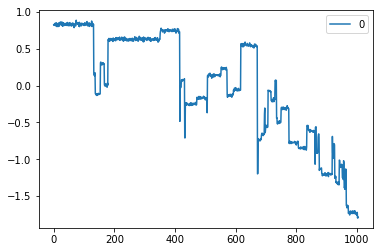

In [217]:
# mz = pd.read_csv("./log/20191111_130325_comdataqsu1/mz.csv").values
mz= np.mean(ps['zz'],0)
pd.DataFrame(mz).plot()

In [14]:
np.mean(mu, axis=0)*1e3

NameError: name 'mu' is not defined

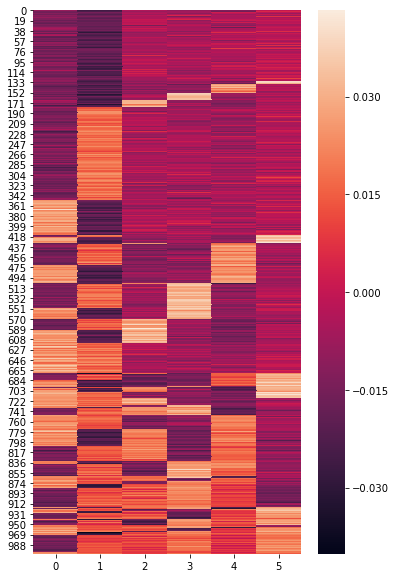

In [9]:
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu, cbar = True)

In [11]:
print(np.round(np.mean(abs(mu),0)*1e4, 2))
hv.Bars(np.mean(abs(mu),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[183.03 184.19 110.74 126.06 113.93  87.88]


:Bars   [x]   (y)

In [12]:
print(np.round(np.mean(mu,0)*1e4, 2))
hv.Bars(np.mean(mu,0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[ 1.38  1.76  1.22 -0.79  1.23  1.17]


:Bars   [x]   (y)

In [182]:
pd.DataFrame(data['D']).iloc[929]

0    1
1    0
2    1
3    0
4    1
5    1
Name: 929, dtype: int64

## Standardized u's

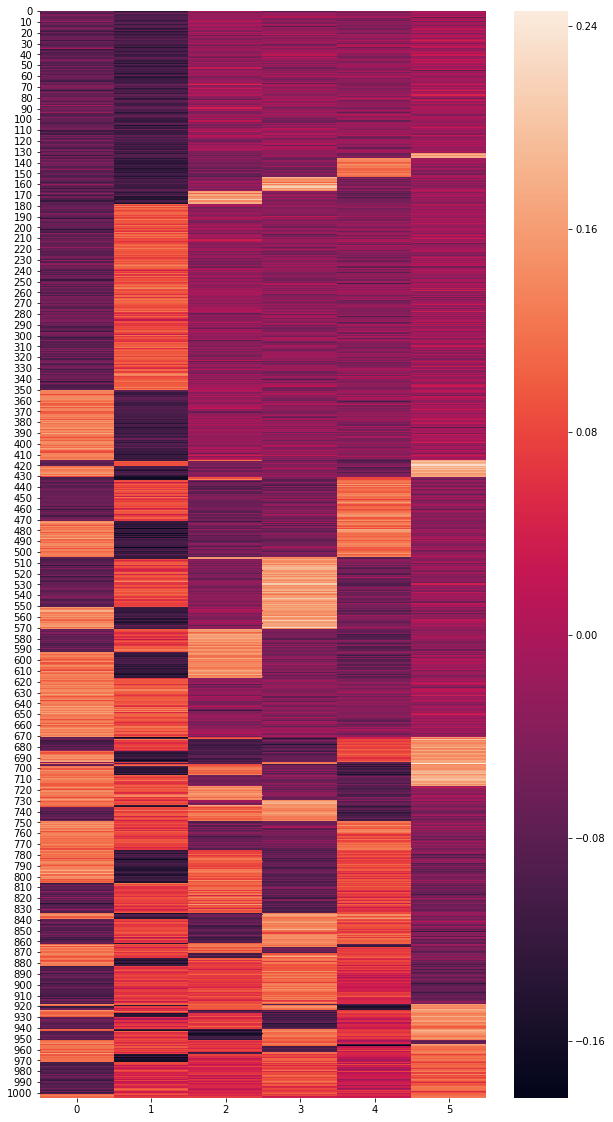

In [22]:
stdu = mu/np.sqrt(mu2 - mu**2)
plt.figure(figsize=(10,20))
ax = sns.heatmap(stdu, cbar = True )

## Residual Analysis

In [25]:
def get_residuals(mu, mu2, by_axis, absval = True, sort=False):
    """
    params
    ps_u posterior samples of u
    by_axis 0=residuals per iterm, 1=residuals per subject
    """
    mean_u = mu #mean posterior residual matrix
    std_u = np.sqrt(mu2 - mean_u**2) #std of posterior residual matrix
    if absval:
        res = pd.DataFrame(np.sum(np.abs(mean_u/std_u), axis=by_axis)).reset_index()
    else:
        res = pd.DataFrame(np.sum(mean_u/std_u, axis=by_axis)).reset_index()
    res.columns = ['index', 'residual']
    
    if sort:
        res.sort_values('residual', ascending=False, inplace=True)
    return res

get_residuals(mu, mu2, 1, False, True).head()


,index,residual
1002,1002,0.487867
1003,1003,0.470441
1004,1004,0.437583
964,964,0.427977
956,956,0.391356


In [26]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = get_residuals(mu, mu2, 1, False, True)

hv.Bars(res[:20], hv.Dimension('index'), 'residual',\
        label='Top 20 Residuals').options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (residual)

In [443]:
Z = np.mean(abs(ps['zz']), 0)
mean_flag = np.mean(Z[500:])
mean_flag

0.8965378028330893